# Análisis gridsearch de Delta_global_max y Delta_local_max

Para llevar a cabo este gridsearch de los siete parámetros se han fijado cinco.

* Parámetros referentes a la transición: [0.97429029, 0.10169132, 0.98861248, 0.44340385]
* Omega_max = 20 * 1e6

Se han evaluado 150 puntos por parámetro.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
df = pd.read_csv('results_gridsearch_v2.csv')

In [4]:
df.head()

,cost,param0,param1
0,0.245783,0.669456,0.000000
1,0.266804,0.669456,0.004184
2,0.288996,0.669456,0.008368
3,0.312147,0.669456,0.012552
4,0.336219,0.669456,0.016736


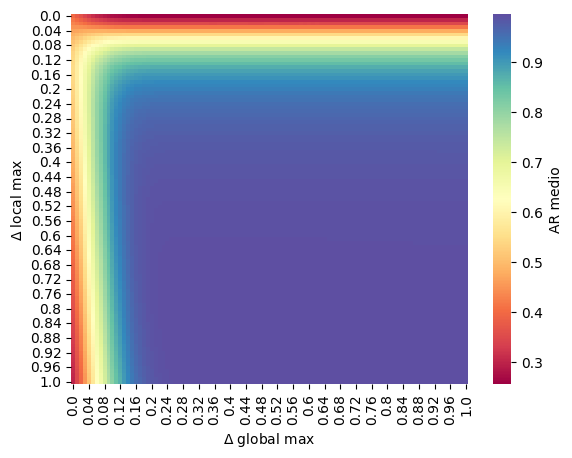

In [8]:
df_rounded=df.copy()
df_rounded["param0"] = df_rounded["param0"].round(2)
df_rounded["param1"] = df_rounded["param1"].round(2)

pivot_table = df_rounded.pivot_table(values="cost", index='param1', columns='param0')
sns.heatmap(pivot_table, cmap="Spectral" , cbar_kws={"label": "AR medio"})
plt.xlabel("$\Delta$ global max")
plt.ylabel("$\Delta$ local max")

plt.show()

In [ ]:
import plotly.graph_objects as go

# Suponemos que ya tienes el DataFrame df
# Seleccionar los parámetros a visualizar
x_param = "param0"
y_param = "param1"

# Crear tabla pivote
pivot = df.pivot_table(values="cost", index=y_param, columns=x_param)
X, Y = np.meshgrid(pivot.columns.values, pivot.index.values)
Z = pivot.values

# Crear figura 3D interactiva
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Spectral')])

fig.update_layout(
    title=f'Superficie 3D de {x_param} vs {y_param}',
    scene=dict(
        xaxis_title=x_param,
        yaxis_title=y_param,
        zaxis_title='cost'
    ),
    width=800,
    height=700
)

fig.show()


Vemos que la función de coste aumenta rápidamente cuando los valores de param0 y param1 crecen y se satura en un valor de 1.

In [42]:
n_puntos = 100
df_filtered = df[df['param0'] == 0.0]
valores_param1 = df_filtered['param1'].unique()

indices = np.linspace(0, len(valores_param1) - 1, n_puntos, dtype=int)
lista_valores = valores_param1[indices]

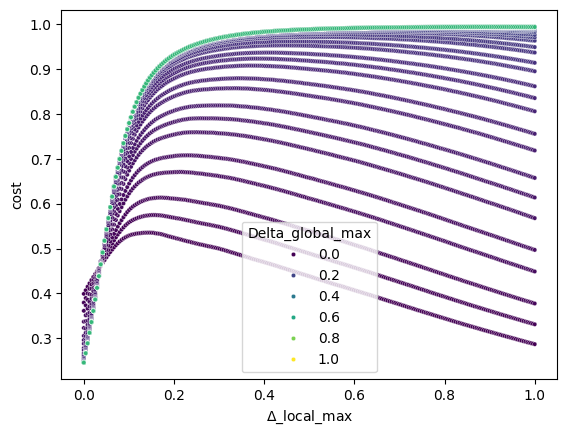

In [47]:
df_filtered = df[df['param0'].isin(lista_valores)]
# palette = sns.color_palette("viridis", n_colors=n_puntos)
sns.scatterplot(data=df_filtered, x='param1', y='cost', hue='param0', palette="viridis", alpha=1, s=10)
plt.xlabel('$\Delta$_local_max')
plt.legend(title='Delta_global_max')
plt.show()

Vemos que en un principio, para valores bajos de param0 (Delta_global_max) hay un máximo para valores bajos y luego el AR decrece. Sin embargo, al aumentar param0 el AR crece de manera monótona hasta llegar al valor máximo. No sé en que valor de param0 ocurre este cambio de tendencia pero es bastante  majo. Esta región tampoco es interesante porque no se llega a unos valores de AR buenos. Sin embargo, resulta interesante que para los valores de param0 > 0.3 los resultados son exactamente iguales.

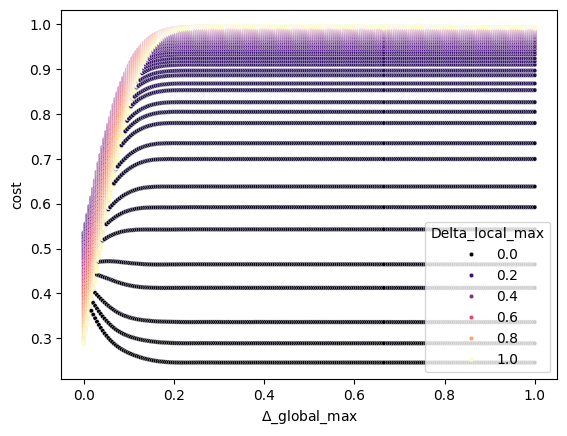

In [48]:
df_filtered = df[df['param1'].isin(lista_valores)]
sns.scatterplot(data=df_filtered, x='param0', y='cost', hue='param1', palette='magma', alpha=1, s=10)
plt.xlabel('$\Delta$_global_max')
plt.legend(title='Delta_local_max')
plt.show()

En primer lugar vemos una confirmación de lo comentado anteriormente. Cuando Delta_global_max > 0.3 los resultados no varían. Sin embargo, al ir aumentando Delta_local_max los resultados siguen mejorando. No es de extrañar que el Delta_local_max sea el más relevante, ya que:
* El detuning local guarda la información de los pesos
* En el hamiltoniano final (el que simula MWIS) los términos que quedan son el término de rydberg y el detuning local
